In [1]:
import glob
import os
from PIL import Image
import numpy as np

def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid

def find_by_key(List , query , key='id'):
    ans = []
    for image in List:
        try:
            if image[key] == query:
                ans.append(image)
            elif query in image[key]:
                ans.append(image)
        except:
            pass
    return ans

def id2file_name(*args):
    
# args = (oneid, coco['images'], 'id', 'file_name')
    ret = []
    oneid = args[0]
    found_items = find_by_key(args[1], oneid , key=args[2])
    if len(found_items)==1:
        name = found_items[0][args[3]]
    #             name = os.path.dirname(name)
        return(name)
    else:
        print('query {} found {} items: {}'.format(oneid, len(found_items) , found_items))
        
def process_name(name):
    name = name.replace('/mnt/fast-disk1/mjc/AutoRecist/Pngs/','')
    name = name.replace('/','_')
    
    ix = name.rfind('_')
    return name[:ix] , name

In [47]:
dataset = 'CUIMC'
# dataset = 'AMGEN'

if dataset == 'AMGEN':
    path_ScaleNAS = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS/mask_1661/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_MVP_Q1 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_MVP_Q2 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Q2/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_ScaleNAS_Q5 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS_Q5/mask_1514/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_ScaleNAS_9Slices = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS_Q5_9Slices/mask_1988/CTs_AMGEN_20020408_9Slices_liver/'
    
elif dataset == 'CUIMC':
    path_ScaleNAS = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS/mask_1661/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_MVP_Q1 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_MVP_Q2 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Q2/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_ScaleNAS_Q5 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS_Q5/mask_1514/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_ScaleNAS_9Slices = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS_Q5_9Slices/mask_1988/CTs_CUIMC_9Slices_liver/'
else:
    raise 
    
path_save = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Comparison/ScaleNASQ5_3vs9Slices_%s/'%dataset
if not os.path.exists(path_save):
    os.makedirs(path_save)

[]

In [16]:
p1 , p2 , p3 = path_MVP_Q2 , path_ScaleNAS , path_ScaleNAS_Q5
files = glob.glob( os.path.join(p1, '*.png' ) )
files.sort()
files = [os.path.split(f)[1] for f in files]
for file in files:
        
    im1 = Image.open(os.path.join( p1,file ))
    im2 = Image.open(os.path.join( p2,file ))
    im3 = Image.open(os.path.join( p3,file ))
    images = [im1,im2,im3]
    im = pil_grid(images)
    
    im.save(os.path.join(path_save, file ))

In [48]:
import sys
sys.path.append('../lib/')
sys.path.append('../lib/dataset/')
from dataset_catalog import DATASETS


if dataset == 'AMGEN':
    dataset_name = 'PDS_AMGEN_20020408_22Cat_test'
elif dataset == 'CUIMC':
    dataset_name = 'PDS_CUIMC_22Cat_test'
else:
    raise 

print(DATASETS[dataset_name])

import json
import os
import numpy as np

annotation_path = DATASETS[dataset_name]['annotation_file']
print('loading:', annotation_path)
with open(annotation_path) as json_file:
    coco = json.load(json_file)

print('images len: %d annotations len: %d' %( len(coco['images']) , len(coco['annotations']) ) )

p1 , p2  = path_ScaleNAS_Q5 ,path_ScaleNAS_9Slices
files = glob.glob( os.path.join(p1, '*.png' ) )
files.sort()
files = [os.path.split(f)[1] for f in files]
for file in files:
    try:
        
        im1 = Image.open(os.path.join( p1,file ))

        oneid = int(file.replace('.png' , ''))
        file_name = id2file_name(oneid, coco['images'], 'id', 'file_name')
        subpath,name = process_name(file_name)
        im2 = Image.open(os.path.join( p2,subpath,name ))

        images = [im1,im2]
        im = pil_grid(images)

        im.save(os.path.join(path_save, name ))
        print(file,name)
    except:
        
        print('=======ERROR and skipped {} {}========'.format(file,name))

{'image_directory': '/mnt/fast-disk1/mjc/AutoRecist/', 'annotation_file': '/mnt/fast-data/mjc/AutoRECIST//Annotations/CUIMC_20201202.json'}
loading: /mnt/fast-data/mjc/AutoRECIST//Annotations/CUIMC_20201202.json
images len: 4808 annotations len: 6779
000001.png PDS_AUTO_RECIST_METNET0001_D2018_12_03_E2952_CT_S0002_6566_019.png
000002.png PDS_AUTO_RECIST_METNET0001_D2018_12_03_E2952_CT_S0002_6566_020.png
000003.png PDS_AUTO_RECIST_METNET0001_D2018_12_03_E2952_CT_S0002_6566_021.png
000020.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_017.png
000021.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_018.png
000022.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_019.png
000023.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_020.png
000024.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_021.png
000025.png PDS_AUTO_RECIST_METNET0002_D2019_01_02_E1326_CT_S0007_3337_022.png
000031.png PDS_AUTO_RECIST_METNET0002_D2019_01_

000001.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_100.png
000002.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_101.png
000003.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_102.png
000004.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_103.png
000005.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_104.png
000006.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_105.png
000025.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_089.png
000026.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_090.png
000027.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_091.png
000028.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_092.png
000029.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_093.png
000030.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_094.png
000031.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_095.png
000032.png AMGEN_20020408_BAIJC_D2004_02_27_E20040227_CT_S0002_096.png
000033

In [44]:
whos

Variable                Type             Data/Info
--------------------------------------------------
DATASETS                dict             n=86
Image                   module           <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
ScaleNAS_9Slice_name    tuple            n=2
annotation_path         str              /mnt/fast-data/mjc/AutoRE<...>EN_20020408_20201202.json
coco                    dict             n=5
dataset                 str              AMGEN
dataset_name            str              PDS_AMGEN_20020408_22Cat_test
file                    str              000234.png
file_name               str              /mnt/fast-disk1/mjc/AutoR<...>20040830/CT/S0003/044.png
files                   list             n=4733
find_by_key             function         <function find_by_key at 0x7faebe0492f0>
glob                    module           <module 'glob' from '/mnt<...>s/lib/python3.6/glob.py'>
id2file_name            function         <function id2file_name at 0x7faeb

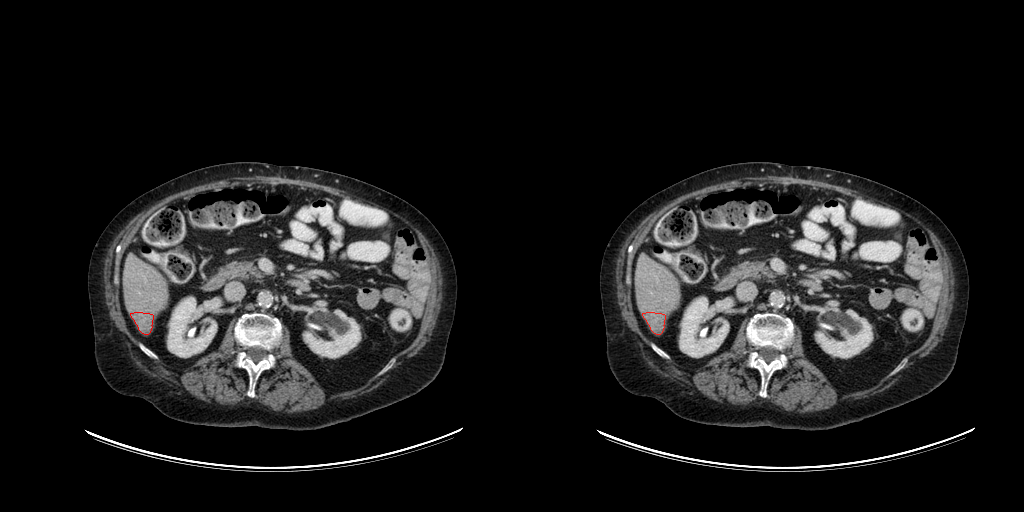

In [43]:
im

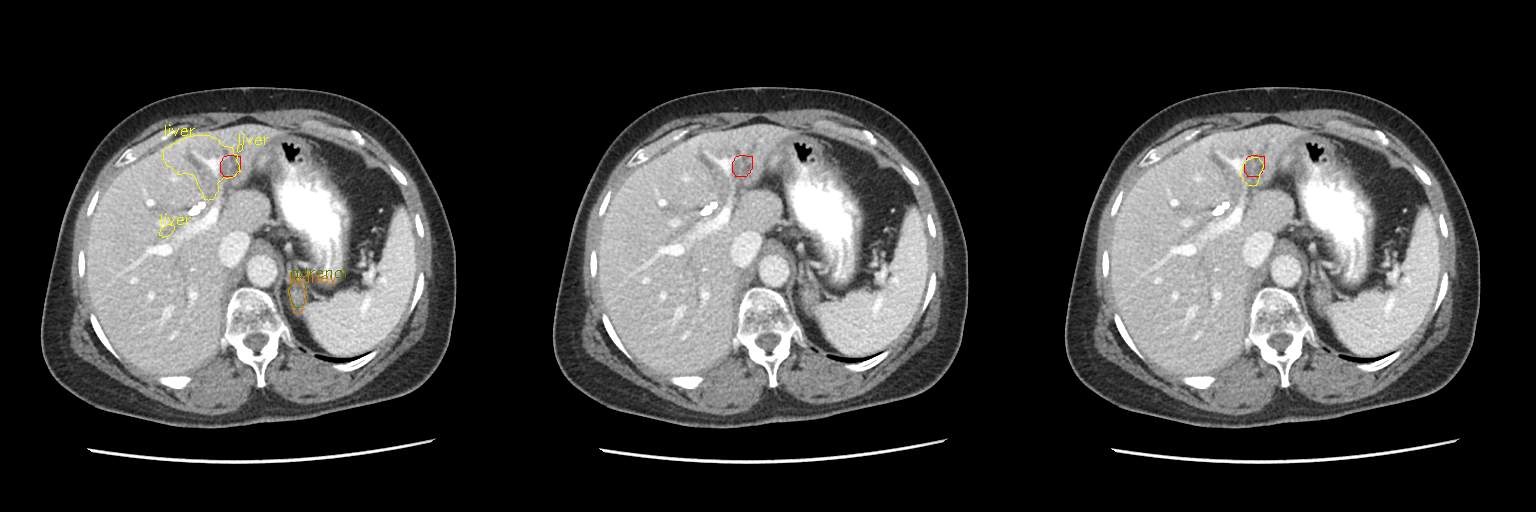

In [5]:
im

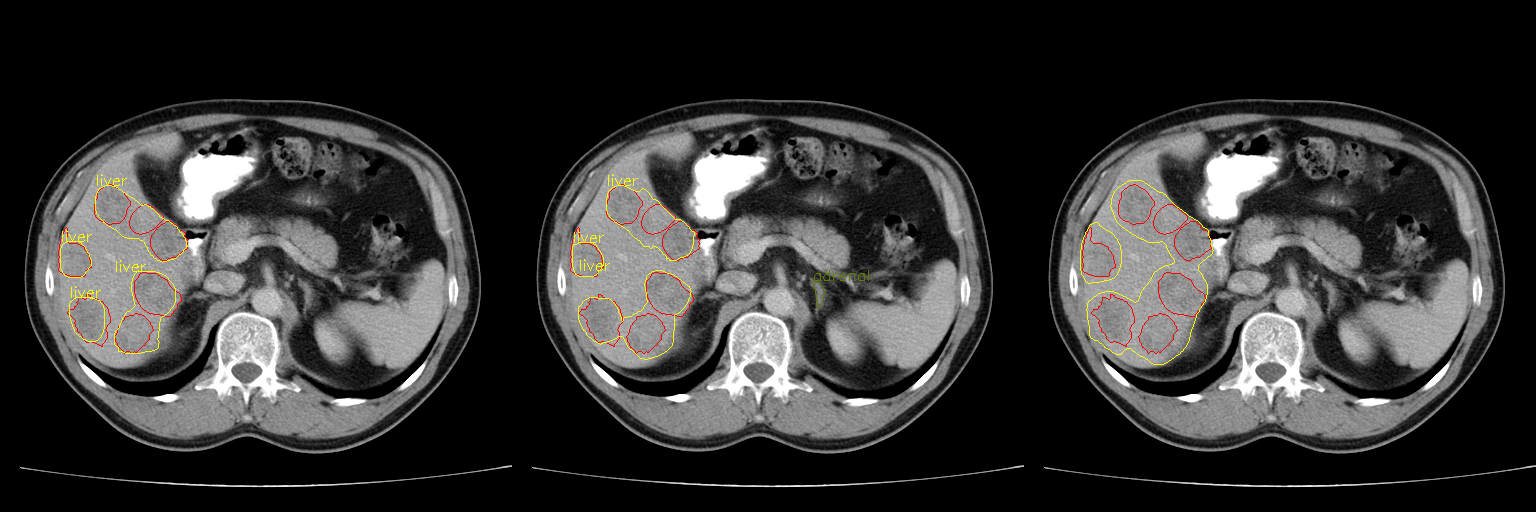

In [23]:
im

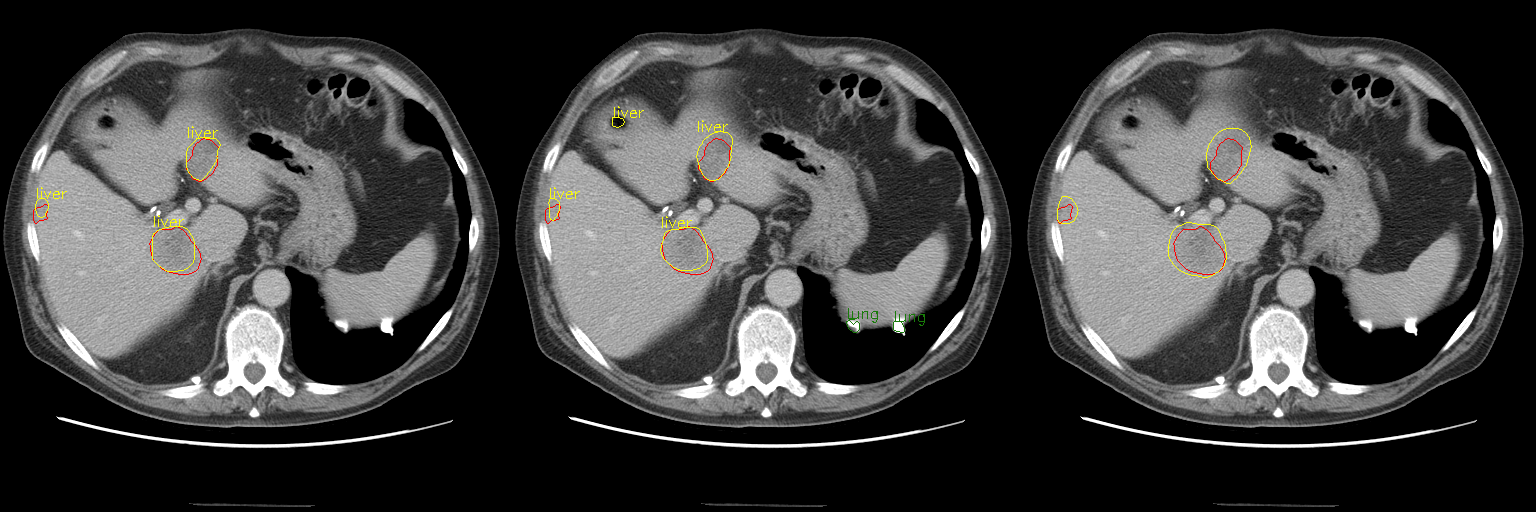

In [19]:
im